# IPM Visualization Test Notebook
by Izaac Molina


## Goal and Purpose
The traditional way to design a model in epymorph is to first draw a ipm model, then translate that model into an ipm object via code. This project seeks to go in the other direction: turning an ipm object into a model. This is great both for educational and debugging purposes as it allows users to present their model more clearly as well as check to ensure they have implemented the model correctly in epymorph

## Design
The "viz" module uses GraphViz, a software that when combined with a Python Library can be used to convert the ipm into a graph object, which can then be printed as a .png.

The primary nethod in viz is the render_module method, which takes in the following parameters:
- ipm: the ipm object to be converted into a model to display
- save: an optional flag for whether the model should be saved in the "model_pngs" directory
- file: an optional name to be used when the file is saved

viz.render_model(ipm: CompartmentModel, save: bool, filename: str)

## Viz applied to ipms in the epymorph system:

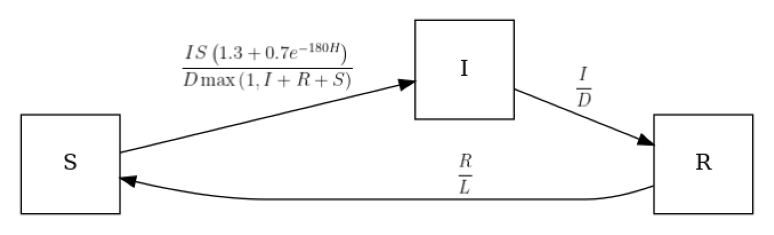

In [9]:
import viz
from epymorph import ipm_library

ipm = ipm_library['pei']()

viz.render_model(ipm)

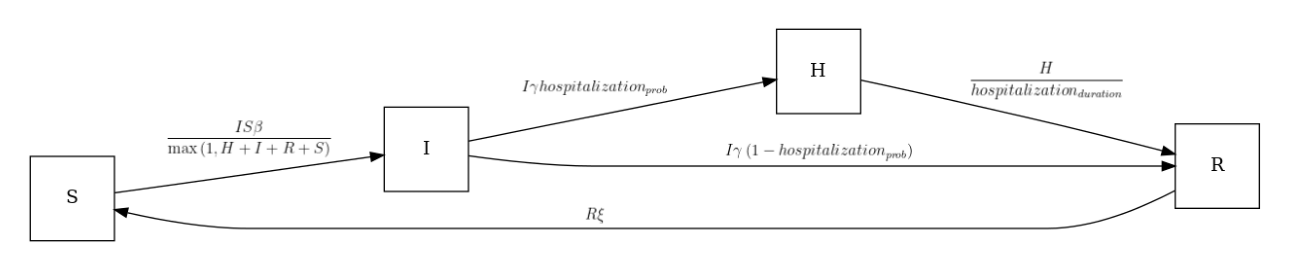

In [10]:
ipm = ipm_library['sirh']()

viz.render_model(ipm, True, 'sirh')

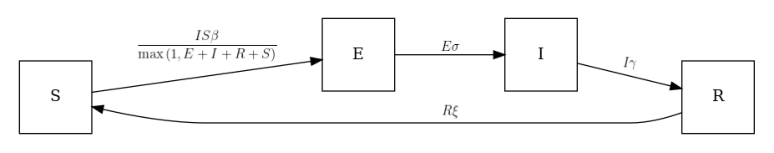

In [3]:
ipm = ipm_library['seirs']()

viz.render_model(ipm)

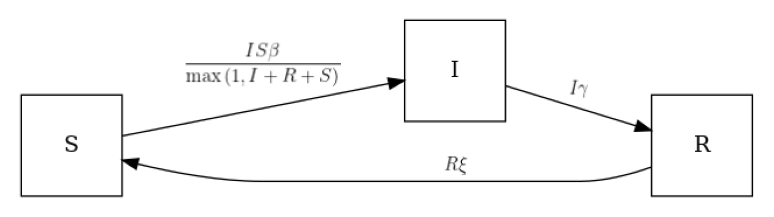

In [4]:
ipm = ipm_library['sirs']()

viz.render_model(ipm)

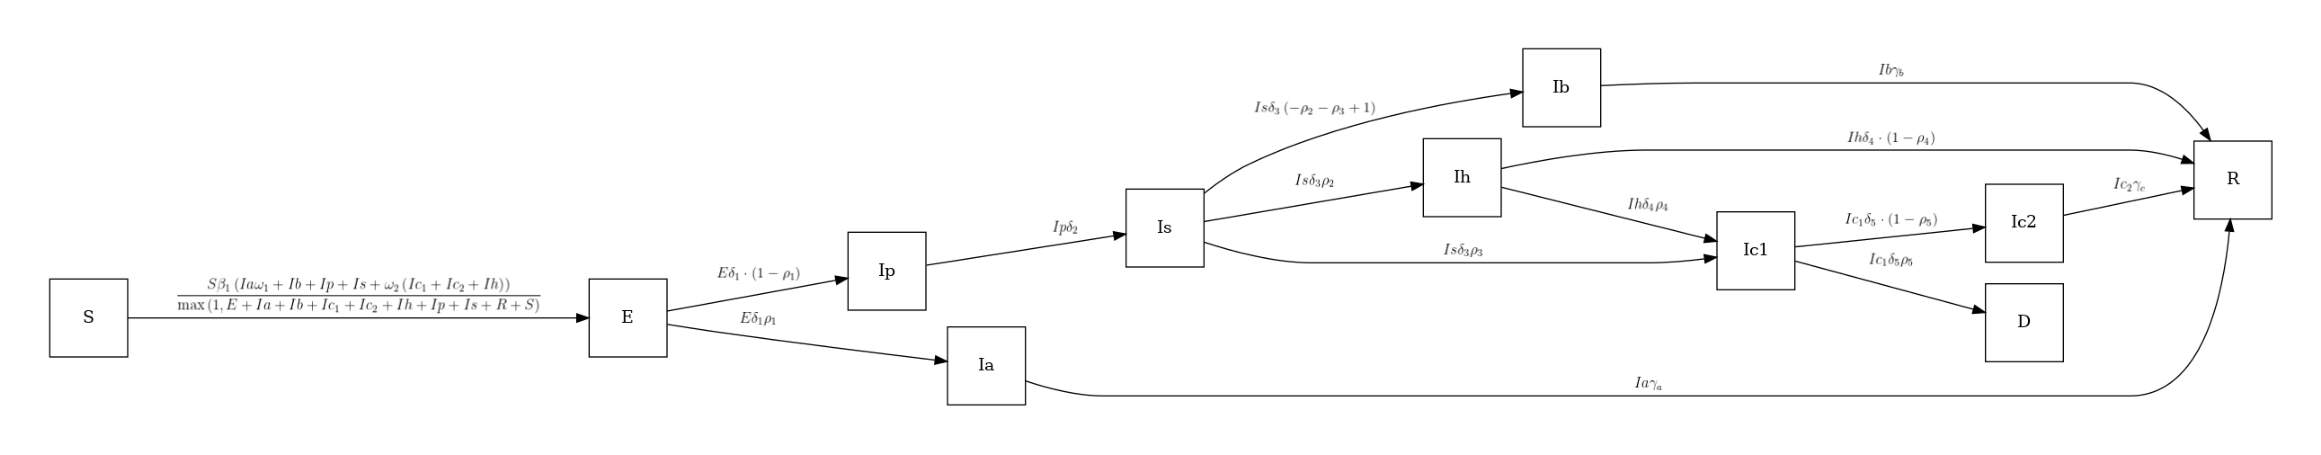

In [5]:
ipm = ipm_library['sparsemod']()

viz.render_model(ipm)

## The LaTeX conversion in viz auto truncates overly long constant values

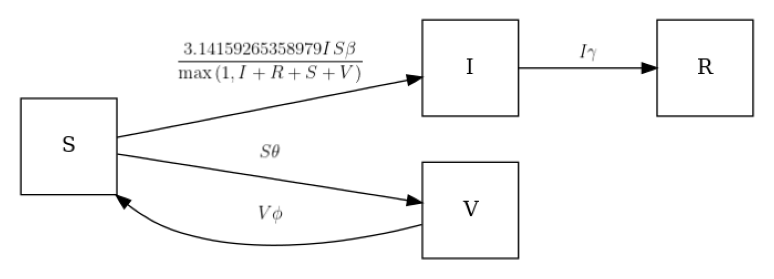

In [6]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('phi', shape=Shapes.TxN), # add a parameter to simulate the rate at which vaccinated become susceptible
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195909216420198938095257201065485863278865936153381827968230301952035301852968995773622599413891249721775283479131515574857242454150695950829533116861727855889075098381754637464939319255060400927701671139009848824012858361603563707660104710181942955596198946767837449448255379774726847104047534646208046684259069491293313677028989152104752162056966024058038150193511253382430035587640247496473263914199272604269922796782354781636009341721641219924586315030286182974555706749838505494588586926995690927210797509302955321165344987202755960236480665499119881834797753566369807426542527862551818417574672890977772793800081647060016145249192173217214772350141441973568548161361157352552133475741849468438523323907394143334547762416862518983569485562099219222184272550254256887671790494601653466804988627232791786085784383827967976681454100953883786360950680064225125205117392984896084128488626945604241965285022210661186306744278622039194945047123713786960956364371917287467764657573962413890865832645995813390478027590099465764078951269468398352595709825822620522489407726719478268482601476990902640136394437455305068203496252451749399651431429809190659250937221696461515709858387410597885959772975498930161753928468138268683868942774155991855925245953959431049972524680845987273644695848653836736222626099124608051243884390451244136549762780797715691435997700129616089441694868555848406353422072225828488648158456028506016842739452267467678895252138522549954666727823986456596116354886230577456498035593634568174324112515076069479451096596094025228879710893145669136867228748940560101503308617928680920874760917824938589009714909675985261365549781893129784821682998948722658804857564014270477555132379641451523746234364542858444795265867821051141354735739523113427166102135969536231442952484937187110145765403590279934403742007310578539062198387447808478489683321445713868751943506430218453191048481005370614680674919278191197939952061419663428754440643745123718192179998391015919561814675142691239748940907186494231961567945208095146550225231603881930142093762137855956638937787083039069792077346722182562599661501421503068038447734549202605414665925201497442850732518666002132434088190710486331734649651453905796268561005508106658796998163574736384052571459102897064140110971206280439039759515677157700420337869936007230558763176359421873125147120532928191826186125867321579198414848829164470609575270695722091756711672291098169091528017350671274858322287183520935396572512108357915136988209144421006751033467110314126711136990865851639831501970165151168517143765761835155650884909989859982387345528331635507647918535893226185489632132933089857064204675259070915481416549859461637180270981994309924488957571282890592323326097299712084433573265489382391193259746366730583604142813883032038249037589852437441702913276561809377344403070746921120191302033038019762110110044929321516084244485963766983895228684783123552658213144957685726243344189303968642624341077322697802807318915441101044682325271620105265227211166039666557309254711055785376346682065310989652691862056476931257058635662018558100729360659876486117910453348850346113657686753249441668039626579787718556084552965412665408530614344431858676975145661406800700237877659134401712749470420562230538994561314071127000407854733269939081454664645880797270826683063432858785698305235808933065757406795457163775254202114955761581400250126228594130216471550979259230990796547376125517656751357517829666454779174501129961489030463994713296210734043751895735961458901938971311179042978285647503203198691514028708085990480109412147221317947647772622414254854540332157185306142288137585043063321751829798662237172159160771669254748738986654949450114654062843366393790039769265672146385306736096571209180763832716641627488880078692560290228472104031721186082041900042296617119637792133757511495950156604963186294726547364252308177036751590673502350728354056704038674351362222477158915049530984448933309634087807693259939780541934144737744184263129860809988868741326047215695162396586457302163159819319516735381297416772947867242292465436680098067692823828068996400482435403701416314965897940924323789690706977942236250822168895738379862300159377647165122893578601588161755782973523344604281512627203734314653197777416031990665541876397929334419521541341899485444734567383162499341913181480927777103863877343177207545654532207770921201905166096280490926360197598828161332316663652861932668633606273567630354477628035045077723554710585954870279081435624014517180624643626794561275318134078330336254232783944975382437205835311477119926063813346776879695970309833913077109870408591337464144282277263465947047458784778720192771528073176790770715721344473060570073349243693113835049316312840425121925651798069411352801314701304781643788518529092854520116583934196562134914341595625865865570552690496520985803385072242648293972858478316305777756068887644624824685792603953527734803048029005876075825104747091643961362676044925627420420832085661190625454337213153595845068772460290161876679524061634252257719542916299193064553779914037340432875262888963995879475729174642635745525407909145135711136941091193932519107602082520261879853188770584297259167781314969900901921169717372784768472686084900337702424291651300500516832336435038951702989392233451722013812806965011784408745196012122859937162313017114448464090389064495444006198690754851602632750529834918740786680881833851022833450850486082503930213321971551843063545500766828294930413776552793975175461395398468339363830474611996653858153842056853386218672523340283087112328278921250771262946322956398989893582116745627010218356462201349671518819097303811980049734072396103685406643193950979019069963955245300545058068550195673022921913933918568034490398205955100226353536192041994745538593810234395544959778377902374216172711172364343543947822181852862408514006660443325888569867054315470696574745855033232334210730154594051655379068662733379958511562578432298827372319898757141595781119635833005940873068121602 * β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate = φ * V),
        ]
    )


debug_ipm = construct_ipm()

viz.render_model(debug_ipm)

## Edges will extend along with attribute names

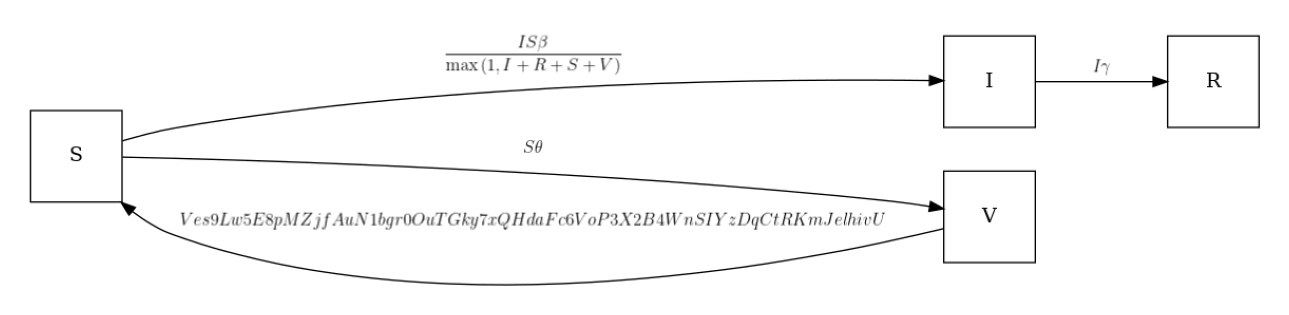

In [7]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('es9Lw5E8pMZjfAuN1bgr0OuTGky7xQHdaFc6VoP3X2B4WnSIYzDqCtRKmJelhivU', shape=Shapes.TxN)
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, lorem] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate = lorem * V), 
        ]
    )


debug_ipm = construct_ipm()

viz.render_model(debug_ipm)

## Repeat edges are summed in the label

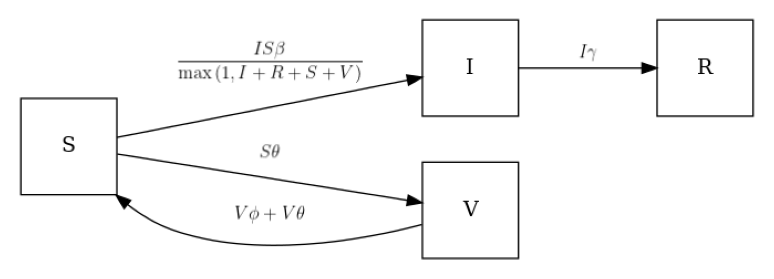

In [8]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('phi', shape=Shapes.TxN)
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate=φ * V),
            edge(V, S, rate=θ * V) # notice the repeat edge
        ]
    )


debug_ipm = construct_ipm()

viz.render_model(debug_ipm)